<a href="https://colab.research.google.com/github/mustafa-vu/dmpm-qb/blob/main/qb4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Installing the package
install.packages("dplyr")
   
# Loading package
library(dplyr)
   
# Summary of dataset in package
summary(mtcars)

# Installing the package
install.packages("caTools")    # For Logistic regression
install.packages("ROCR")       # For ROC curve to evaluate model
    
# Loading package
library(caTools)
library(ROCR) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Splitting dataset
split <- sample.split(mtcars, SplitRatio = 0.8)
split
   
train_reg <- subset(mtcars, split == "TRUE")
test_reg <- subset(mtcars, split == "FALSE")
   
# Training model
logistic_model <- glm(vs ~ wt + disp, data = train_reg, family = "binomial")
logistic_model
   
# Summary
summary(logistic_model)
   
# Predict test data based on model
predict_reg <- predict(logistic_model, test_reg, type = "response")
predict_reg  
   
# Changing probabilities
predict_reg <- ifelse(predict_reg >0.5, 1, 0)
   
# Evaluating model accuracy using confusion matrix
table(test_reg$vs, predict_reg)
   
missing_classerr <- mean(predict_reg != test_reg$vs)
print(paste('Accuracy =', 1 - missing_classerr))
   



[1] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE


Call:  glm(formula = vs ~ wt + disp, family = "binomial", data = train_reg)

Coefficients:
(Intercept)           wt         disp  
     1.7646       1.2366      -0.0275  

Degrees of Freedom: 22 Total (i.e. Null);  20 Residual
Null Deviance:	    31.84 
Residual Deviance: 17.85 	AIC: 23.85


Call:
glm(formula = vs ~ wt + disp, family = "binomial", data = train_reg)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7121  -0.3346  -0.1331   0.6103   1.7795  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.76463    2.66155   0.663   0.5073  
wt           1.23664    1.56514   0.790   0.4295  
disp        -0.02750    0.01496  -1.837   0.0661 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 31.841  on 22  degrees of freedom
Residual deviance: 17.849  on 20  degrees of freedom
AIC: 23.849

Number of Fisher Scoring iterations: 6


Mazda RX4     Duster 360       Merc 230     Merc 450SE       Fiat 128 
    0.64685169     0.02367905     0.85675220     0.31309169     0.91062420 
Toyota Corolla    AMC Javelin Ford Pantera L  Maserati Bora 
    0.88883330     0.08735546     0.01858958     0.10939591

   predict_reg
    0 1
  0 5 1
  1 0 3

[1] "Accuracy = 0.888888888888889"


In [5]:
# ROC-AUC Curve
ROCPred <- prediction(predict_reg, test_reg$vs) 
ROCPer <- performance(ROCPred, measure = "tpr", 
                             x.measure = "fpr")
   
auc <- performance(ROCPred, measure = "auc")
auc <- auc@y.values[[1]]
auc
   

[1] 0.9166667

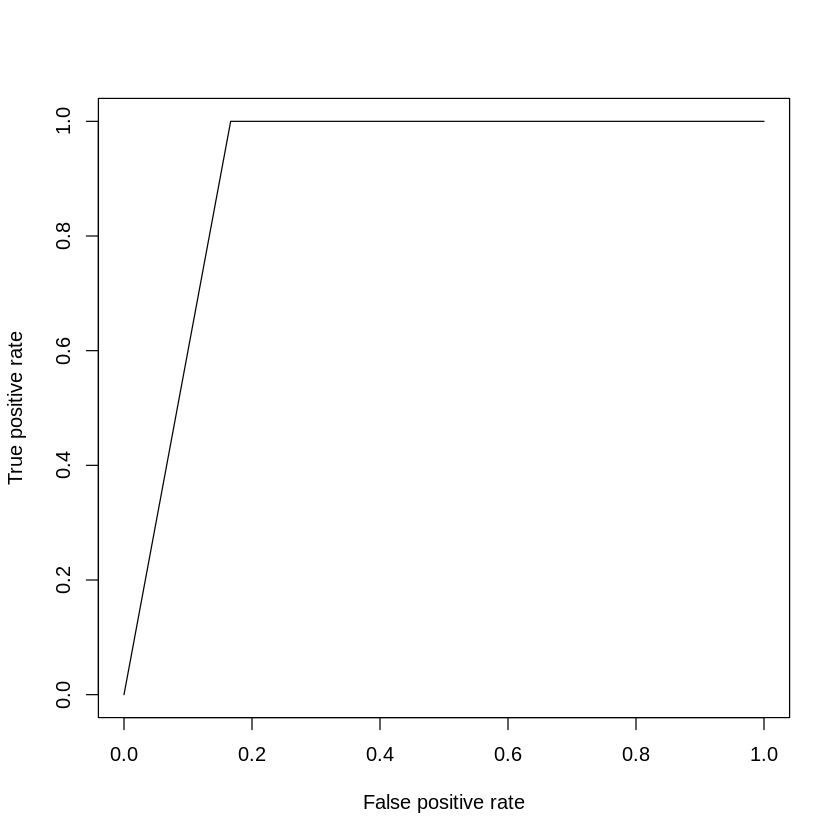

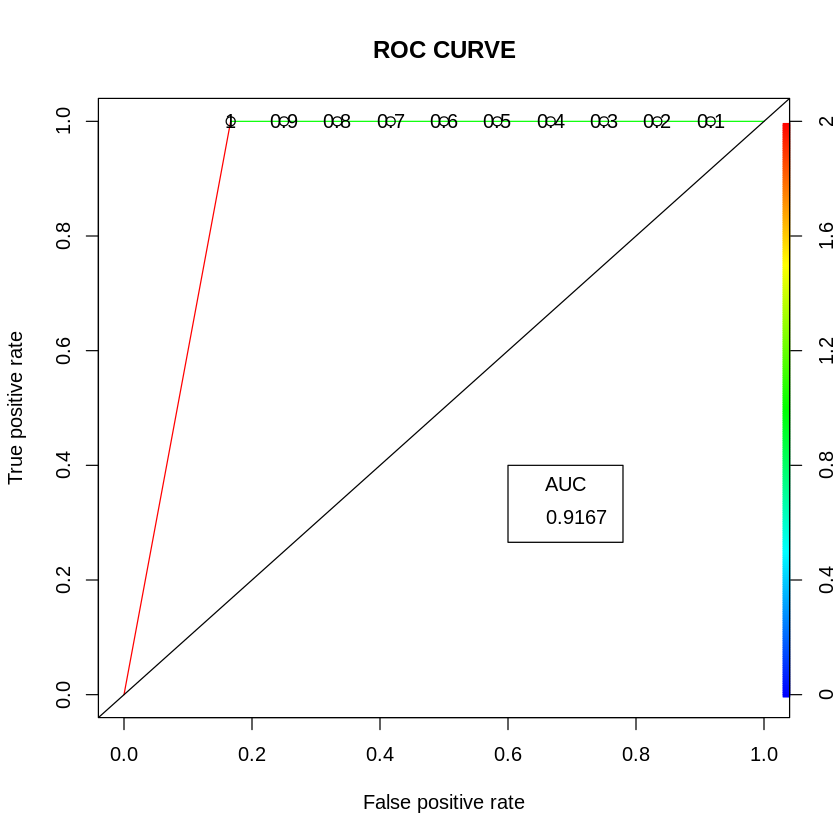

In [6]:
# Plotting curve
plot(ROCPer)
plot(ROCPer, colorize = TRUE, 
     print.cutoffs.at = seq(0.1, by = 0.1), 
     main = "ROC CURVE")
abline(a = 0, b = 1)
   
auc <- round(auc, 4)
legend(.6, .4, auc, title = "AUC", cex = 1)